In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [ ]:
print(len(x_train))
print(len(x_test))

60000
10000


In [ ]:
x_train[0].shape

(28, 28)

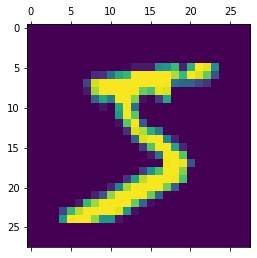

In [ ]:
plt.matshow(x_train[0])

In [ ]:
#**Flattening** **those** **Images**

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# x_train = x_train / 255
# x_test = x_test / 255

In [ ]:
# x_train[0]

In [ ]:
# plt.matshow(x_train.reshape(len(x_train),28*28))
X_train_Flattened = x_train.reshape(len(x_train),28*28)
X_test_Flattened = x_test.reshape(len(x_test),28*28)

#**Now Let's Check Its Updated Shape**

In [ ]:
X_train_Flattened.shape
X_test_Flattened.shape

(10000, 784)

In [ ]:
model = keras.Sequential([
                          keras.layers.Dense(10,input_shape = (784,),activation='sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)
model.fit(X_train_Flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4655 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3039 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2831 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2730 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2663 - accuracy: 0.9253


In [ ]:
model.evaluate(X_test_Flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2678 - accuracy: 0.9248


[0.2677709758281708, 0.9247999787330627]

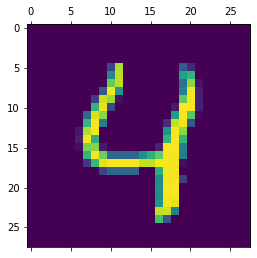

In [ ]:
plt.matshow(x_test[4])

In [ ]:
y_predict = model.predict(X_test_Flattened)
y_predict[4]

array([3.5886616e-02, 2.1299695e-05, 1.6208068e-01, 4.9400628e-03,
       9.8320365e-01, 9.4422996e-03, 9.2173666e-02, 1.8274176e-01,
       2.3118770e-01, 6.9161052e-01], dtype=float32)

In [ ]:
np.argmax(y_predict[4])

4

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
y_predict[:5]

array([[3.2012403e-02, 4.0842070e-07, 9.0678424e-02, 9.7088027e-01,
        2.2272766e-03, 1.3204601e-01, 1.1796493e-06, 9.9981809e-01,
        1.0847488e-01, 6.8012971e-01],
       [5.0373864e-01, 5.9418082e-03, 9.9910235e-01, 4.6305692e-01,
        7.4885054e-10, 8.8986647e-01, 8.7392735e-01, 9.9683651e-13,
        1.4634570e-01, 2.2812454e-09],
       [3.9392710e-04, 9.9463165e-01, 6.6947383e-01, 3.4465396e-01,
        2.5974840e-02, 1.1361596e-01, 1.1436823e-01, 1.1750144e-01,
        2.9605222e-01, 5.0138533e-02],
       [9.9959409e-01, 1.0317609e-08, 1.3104370e-01, 8.5712969e-03,
        2.7356029e-05, 9.6728623e-02, 4.5845002e-02, 1.3303727e-02,
        2.2426158e-02, 1.7802030e-02],
       [3.5886616e-02, 2.1299695e-05, 1.6208068e-01, 4.9400628e-03,
        9.8320365e-01, 9.4422996e-03, 9.2173666e-02, 1.8274176e-01,
        2.3118770e-01, 6.9161052e-01]], dtype=float32)

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predict]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    2,    2,    0,    4,    3,    2,    1,    0],
       [   0, 1119,    3,    2,    0,    1,    4,    2,    4,    0],
       [   5,    9,  933,   18,    8,    3,   11,    9,   31,    5],
       [   3,    0,   20,  934,    1,   21,    1,    9,   13,    8],
       [   2,    1,    8,    2,  912,    0,    7,    4,    8,   38],
       [  11,    3,    5,   42,   10,  775,    9,    4,   28,    5],
       [  13,    3,   11,    1,    7,   20,  899,    2,    2,    0],
       [   1,    8,   22,   10,    9,    1,    0,  944,    1,   32],
       [   7,   11,    8,   31,    9,   34,    8,   11,  847,    8],
       [  11,    7,    1,   16,   25,    6,    0,   21,    3,  919]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

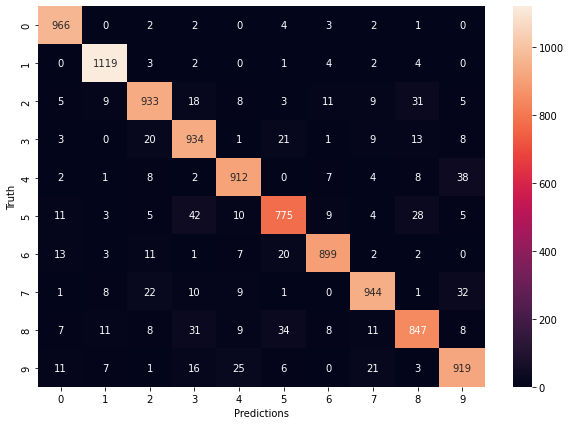

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predictions')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
                          keras.layers.Dense(100,input_shape = (784,),activation='relu'),
                          # keras.layers.Dense(80,activation='relu'),
                          keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)
model.fit(X_train_Flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2728 - accuracy: 0.9216
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1227 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0858 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0648 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0518 - accuracy: 0.9844


In [ ]:
model.evaluate(X_test_Flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0823 - accuracy: 0.9755


[0.08230237662792206, 0.9754999876022339]

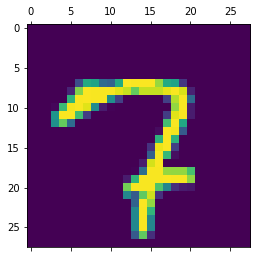

In [ ]:
plt.matshow(x_test[36])

In [ ]:
y_predict = model.predict(X_test_Flattened)
y_predict[36]

array([7.7196956e-04, 4.6966124e-01, 9.8720342e-01, 9.5005792e-01,
       1.1907204e-06, 1.4343858e-04, 1.7006296e-07, 9.9999011e-01,
       9.2381418e-02, 1.7229438e-02], dtype=float32)

In [ ]:
np.argmax(y_predict[36])

7

In [ ]:
cma = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cma

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    2,    2,    0,    4,    3,    2,    1,    0],
       [   0, 1119,    3,    2,    0,    1,    4,    2,    4,    0],
       [   5,    9,  933,   18,    8,    3,   11,    9,   31,    5],
       [   3,    0,   20,  934,    1,   21,    1,    9,   13,    8],
       [   2,    1,    8,    2,  912,    0,    7,    4,    8,   38],
       [  11,    3,    5,   42,   10,  775,    9,    4,   28,    5],
       [  13,    3,   11,    1,    7,   20,  899,    2,    2,    0],
       [   1,    8,   22,   10,    9,    1,    0,  944,    1,   32],
       [   7,   11,    8,   31,    9,   34,    8,   11,  847,    8],
       [  11,    7,    1,   16,   25,    6,    0,   21,    3,  919]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

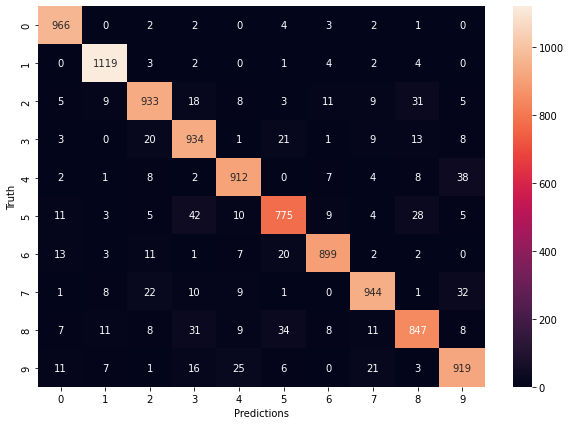

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cma,annot=True,fmt='d')
plt.xlabel('Predictions')
plt.ylabel('Truth')

#**Creating A Flattened Input Variable With Keras**

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(100,activation='relu'),
                          # keras.layers.Dense(80,activation='relu'),
                          keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)
# NOW INSTEAD OF WRITING THE CODE BELOW
# model.fit(X_train_Flattened,y_train,epochs=5)

# just WRITE somwthing like this...
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2765 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1239 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0860 - accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0658 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0519 - accuracy: 0.9841


In [ ]:
model.evaluate(X_test_Flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0810 - accuracy: 0.9755


[0.08098355680704117, 0.9754999876022339]

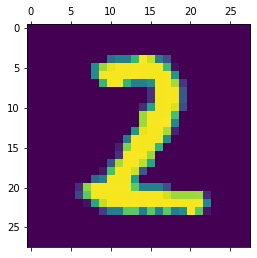

In [ ]:
plt.matshow(x_test[816])

In [ ]:
y_predict = model.predict(X_test_Flattened)
y_predict[816]

array([3.45416738e-05, 9.90744710e-01, 1.00000000e+00, 9.98914719e-01,
       1.54657087e-09, 1.84088945e-03, 2.96853131e-07, 1.23245895e-01,
       9.98853683e-01, 1.05223060e-03], dtype=float32)

In [ ]:
np.argmax(y_predict[816])

2

Text(69.0, 0.5, 'Truth')

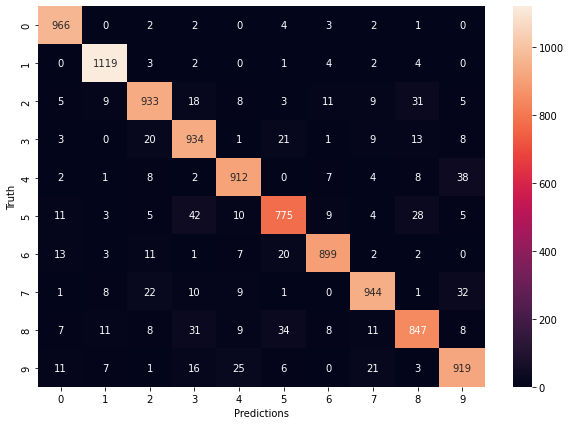

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cma,annot=True,fmt='d')
plt.xlabel('Predictions')
plt.ylabel('Truth')